In [1]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.metrics import precision_score
import random

%matplotlib inline
plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 20,
        'axes.labelsize': 20,
        'xtick.labelsize': 20,
        'ytick.labelsize': 20,
        'font.size': 20,
        'figure.figsize': (10, 7),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })

In [2]:
import warnings
warnings.filterwarnings("ignore")

# 1. Exploring the data

## 1.1 Train dataset

In [3]:
titanic_data = pd.read_csv('train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# check the missing data (isna and isnull are same?)
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 1.2 Test dataset

In [7]:
titanic_data_test = pd.read_csv('test.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
titanic_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
titanic_data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 1.3 Create list of DataFrames to transform them together

In [11]:
titanic_combine = [titanic_data, titanic_data_test]

# 2. Analyzing features

In [12]:
# survival rate at Pclass category
titanic_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()\
    .sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
# survival rate at Sex category
titanic_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()\
    .sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [14]:
# survival rate at SibSp category
titanic_data[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean()\
    .sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [15]:
titanic_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()\
    .sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# 3. Data cleaning

#### Cabin column
It seems not very important for building our model and most values are NaNs so we just drop it

In [16]:
print("Before:", titanic_combine[0].shape, titanic_combine[1].shape)

for dataset in titanic_combine:
    dataset.drop(['Cabin'], axis=1, inplace=True)
    
print("After:", titanic_combine[0].shape, titanic_combine[1].shape)
titanic_data.head()

Before: (891, 12) (418, 11)
After: (891, 11) (418, 10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


#### Age column
There are lot of missing values may be we can replace them with values obtained by following method.
Iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

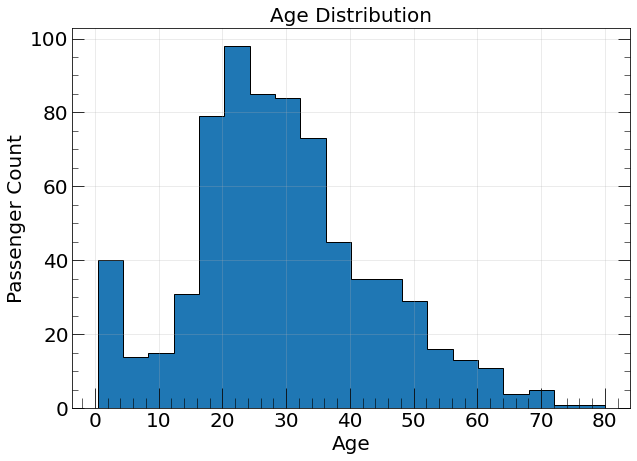

In [18]:
# plot the Age distribution
fig = plt.figure()
ax = plt.hist(titanic_data['Age'], bins=20, histtype='stepfilled', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Passenger Count')
fig.show()

In [19]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
male_female_str = ['male', 'female']

for dataset in titanic_combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == male_female_str[i]) & \
                               (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_mean = guess_df.mean()
            age_std = guess_df.std()
            age_guess = random.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == male_female_str[i]) & (dataset.Pclass == j+1),\
                             'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [21]:
titanic_data['Age'].isnull().sum()

0

In [22]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


#### Now replace Age data with binned ages

In [23]:
titanic_data['AgeBand'] = pd.cut(titanic_data['Age'], 5)
titanic_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()\
    .sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [24]:
for dataset in titanic_combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
    
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,S,"(32.0, 48.0]"


In [25]:
titanic_data = titanic_data.drop(['AgeBand'], axis=1)
titanic_combine = [titanic_data, titanic_data_test]
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,8.0500,S


#### Embarked column
Fill missing values with median too

In [26]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
embarked_mode = titanic_data['Embarked'].mode()[0]
embarked_mode

'S'

In [28]:
for dataset in titanic_combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_mode)

In [29]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [30]:
titanic_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
titanic_combine[0].Embarked.isnull().sum()

0

#### Fare column
About 1.7% of fares are equal to zero, replace it with mean value

In [33]:
print("Before:")
print('Null values:')
for dataset in titanic_combine:
    print(dataset[dataset['Fare'] == 0].Fare.sum())
    
print('NaNs:')
for dataset in titanic_combine:
    print(dataset['Fare'].isna().sum())

Before:
Null values:
0.0
0.0
NaNs:
0
1


In [34]:
for dataset in titanic_combine:
    dataset['Fare'].replace(0, dataset['Fare'].mean(), inplace=True)
    dataset['Fare'].replace(np.NaN, dataset['Fare'].mean(), inplace=True)

In [35]:
# Check if any fares are zero
print("After:")
print('Null values')
for dataset in titanic_combine:
    print(dataset[dataset['Fare'] == 0].Fare.count() / dataset.Fare.count())
    
print('NaNs')
for dataset in titanic_combine:
    print(dataset['Fare'].isna().sum())

After:
Null values
0.0
0.0
NaNs
0
0


In [36]:
titanic_data['Fare'].min()

4.0125

In [37]:
titanic_data_test['Fare'].isna().sum()

0

In [38]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,1.322110,0.523008,0.381594,32.746366
std,257.353842,0.486592,0.836071,0.820081,1.102743,0.806057,49.514272
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.012500
25%,223.500000,0.000000,2.000000,1.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,1.000000,0.000000,0.000000,15.100000
75%,668.500000,1.000000,3.000000,2.000000,1.000000,0.000000,32.204208
max,891.000000,1.000000,3.000000,4.000000,8.000000,6.000000,512.329200


In [39]:
# generate the training set descriptive statistics including only string columns
titanic_data.describe(include=[object])

,Name,Sex,Ticket,Embarked
count,891,891,891,891
unique,891,2,681,3
top,"Meanwell, Miss. (Marion Ogden)",male,CA. 2343,S
freq,1,577,7,646


## 3.1 Adding columns and processing some data

### 3.1.1 Ticket column to Acompained column

Create new 'Acompained' column based on tickets numbers <br>
Passengers with same ticket number counts as acompined

In [40]:
titanic_data['Ticket'].value_counts()

CA. 2343    7
347082      7
1601        7
CA 2144     6
347088      6
           ..
4138        1
373450      1
C 4001      1
347062      1
4137        1
Name: Ticket, Length: 681, dtype: int64

In [41]:
# Create new col
for dataset in titanic_combine:
    dataset['Acompained'] = dataset['Ticket'].duplicated(keep=False).astype(int)
    dataset.drop(['Ticket'], axis=1, inplace=True)
    
#titanic_data = titanic_combine[0].drop(['Ticket'], axis=1)
#titanic_data_test = titanic_combine[1].drop(['Ticket'], axis=1)
#titanic_data.head(10)

In [42]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Acompained
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,8.0500,S,0
5,6,0,3,"Moran, Mr. James",male,1,0,0,8.4583,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,3,0,0,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0,3,1,21.0750,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,1,0,2,11.1333,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0,1,0,30.0708,C,1


In [43]:
titanic_combine[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Acompained
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,8.0500,S,0


### 3.1.2 FamilySize and IsAlone

In [44]:
titanic_data['FamilySize'] = titanic_data['Parch'] + titanic_data['SibSp'] + 1

In [45]:
titanic_data[['FamilySize', 'Survived']].groupby(by='FamilySize').mean()

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [46]:
# Make IsAlon columns instead of FamilySize
titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['FamilySize'] > 1, 'IsAlone'] = 1
titanic_data[['IsAlone', 'Survived']].groupby('IsAlone').mean()

,Survived
IsAlone,
0,0.303538
1,0.505650


In [47]:
titanic_data[['Acompained', 'Survived']].groupby('Acompained').mean()

,Survived
Acompained,
0,0.297989
1,0.520349


In [48]:
for dataset in titanic_combine:
    dataset['IsAlone'] = 0
    dataset['FamilySize'] = dataset['Parch'] + dataset['SibSp'] + 1
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [49]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Acompained   891 non-null    int64  
 11  FamilySize   891 non-null    int64  
 12  IsAlone      891 non-null    int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 90.6+ KB


In [50]:
titanic_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
 9   Acompained   418 non-null    int64  
 10  IsAlone      418 non-null    int64  
 11  FamilySize   418 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 39.3+ KB


In [51]:
# Drop excessive columns: FamilySize, Parch, SibSp

for dataset in titanic_combine:
    dataset.drop(['FamilySize', 'Parch', 'SibSp'], axis=1, inplace=True)
    
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Acompained   891 non-null    int64  
 9   IsAlone      891 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 69.7+ KB


In [52]:
titanic_data[['IsAlone', 'Acompained', 'Survived']]\
    .groupby(by=['IsAlone', 'Acompained']).mean()

Survived
IsAlone Acompained          
0       0           0.447059
        1           0.524164
1       0           0.270563
        1           0.506667

#### Name Column to Title column

In [53]:
# Extract titles which end with '.' into the Name column

for dataset in titanic_combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    print(dataset['Title'].unique())
    
#titanic_data = titanic_combine[0]
#titanic_data_test = titanic_combine[1]
titanic_combine[0].head(10)

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Acompained,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,7.2500,S,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,71.2833,C,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,1,7.9250,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,53.1000,S,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,2,8.0500,S,0,1,Mr
5,6,0,3,"Moran, Mr. James",male,1,8.4583,Q,0,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,3,51.8625,S,0,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,0,21.0750,S,1,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,1,11.1333,S,1,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,0,30.0708,C,1,0,Mrs


In [54]:
# count the number of each title
titanic_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Jonkheer      1
Don           1
Ms            1
Capt          1
Countess      1
Mme           1
Sir           1
Name: Title, dtype: int64

In [55]:
# Replace rare titles with similar ones

for dataset in titanic_combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [56]:
titanic_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [57]:
titanic_combine[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Acompained,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,7.2500,S,0,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,71.2833,C,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,1,7.9250,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,53.1000,S,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,2,8.0500,S,0,1,Mr


In [58]:
# Drop Name column

for dataset in titanic_combine:
    dataset.drop(['Name'], axis=1, inplace=True)

In [59]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Acompained,IsAlone,Title
0,1,0,3,male,1,7.2500,S,0,0,Mr
1,2,1,1,female,2,71.2833,C,0,0,Mrs
2,3,1,3,female,1,7.9250,S,0,1,Miss
3,4,1,1,female,2,53.1000,S,1,0,Mrs
4,5,0,3,male,2,8.0500,S,0,1,Mr


In [60]:
print(titanic_data.Title.unique())
print(titanic_data_test.Title.unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Other']
['Mr' 'Mrs' 'Miss' 'Master' 'Other']


In [61]:
# Also drop PassengerId column
for dataset in titanic_combine:
    dataset.drop(['PassengerId'], axis=1, inplace=True)

In [62]:
titanic_combine[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Acompained  891 non-null    int64  
 7   IsAlone     891 non-null    int64  
 8   Title       891 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


# 4. Data visualisation

Now we have the following categorical predictors:
* Pclass
* Sex
* Embarked
* Acompained
* Title

Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
Values: [C, Q, S]

Parch: The dataset defines family relations in this way... <br>
Parent = mother, father <br>
Child = daughter, son, stepdaughter, stepson <br>
Some children travelled only with a nanny, therefore parch=0 for them. <br>
Values: [0, 1, 2, 3, 4, 5, 6]

SibSp: the dataset defines family relations in this way... <br>
Sibling = brother, sister, stepbrother, stepsister <br>
Values: [0, 1, 2, 3, 4, 5, 8]

Acompained: if person was acompainde on board, see above <br>
Values: [0, 1]

Title: title in name of person <br>
Values: ['Mr', 'Mrs', 'Miss', 'Master', 'Others']

In [63]:
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Acompained,IsAlone,Title
0,0,3,male,1,7.2500,S,0,0,Mr
1,1,1,female,2,71.2833,C,0,0,Mrs
2,1,3,female,1,7.9250,S,0,1,Miss
3,1,1,female,2,53.1000,S,1,0,Mrs
4,0,3,male,2,8.0500,S,0,1,Mr


## 4.1 Features analysis

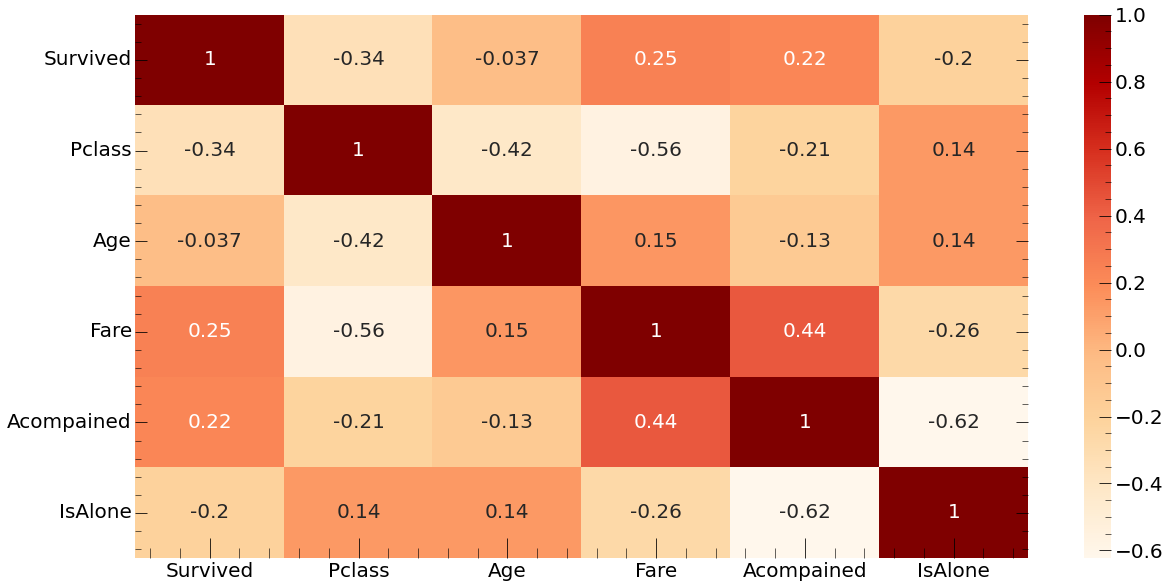

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(titanic_data.corr(), annot = True, cmap="OrRd")
plt.show()

There are storng correlation between some features
* Pclass and Fare (which is expected because tickets to 1st class are more expensive)
* Parch and SibSp
* Acompained and SibSp, Parch, Fair

The following features have some correlation particulary with Survived target
* Pclass
* Fare
* Acompained

In [65]:
# We can look at susvival rate at each Pclass
# squeeze method to make serise
pclass_survived_dist = titanic_data.groupby('Pclass').agg({'Survived': lambda x: x.sum() / x.count()}).squeeze()

# or simply we can do the same with
display(titanic_data.groupby('Pclass').Survived.apply(lambda x: x.sum() / x.count()))


# Or we can just use mean
pclass_survived_dist

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [66]:
def distribution(data, title, x_label, y_label):
    plt.figure(figsize=(8,5))
    plt.style.use('seaborn-pastel')
    density = sns.barplot(x=data.index, y=data.values)
    title = plt.title(title, fontdict={'fontsize': 20})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
plt.show()

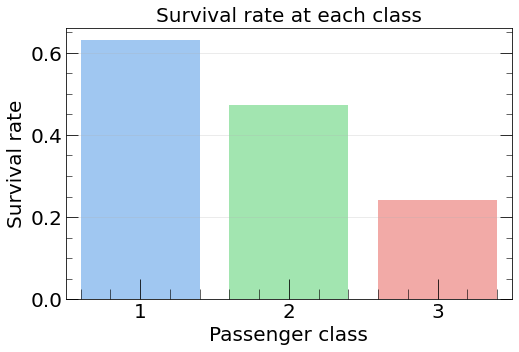

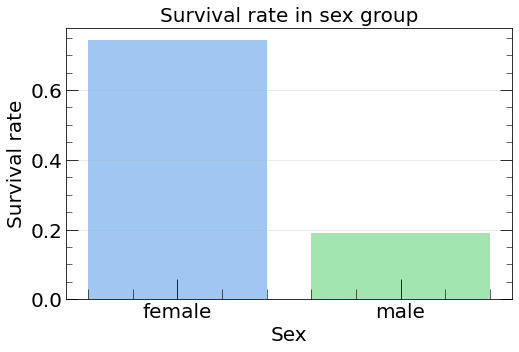

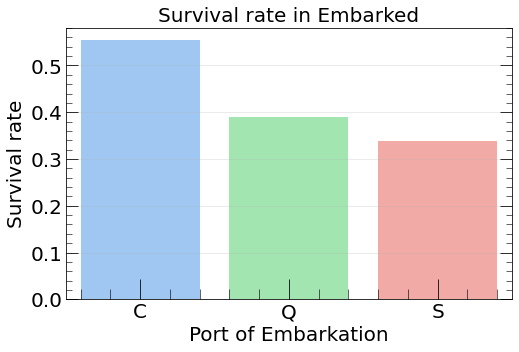

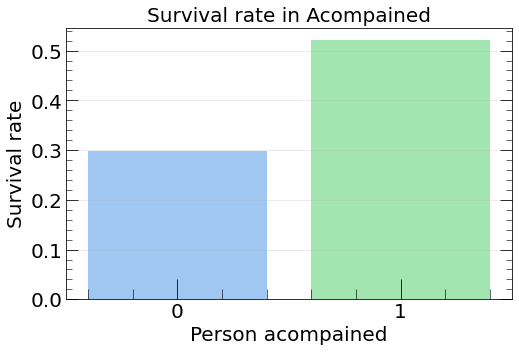

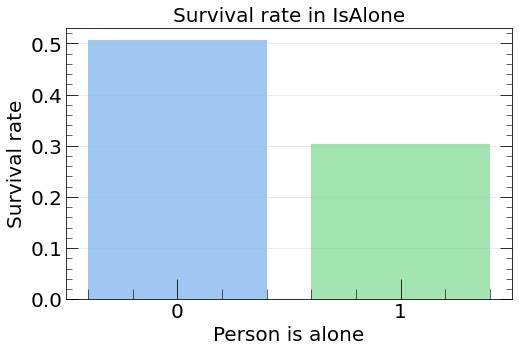

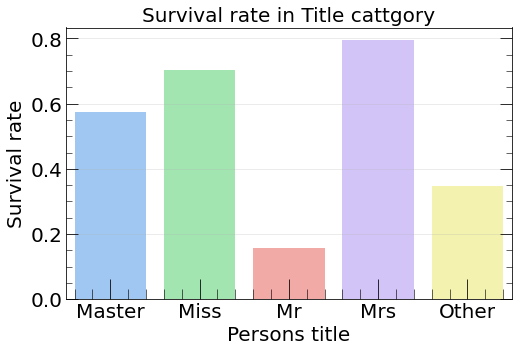

In [67]:
distribution(data=pclass_survived_dist,
             title='Survival rate at each class',
             x_label='Passenger class',
             y_label='Survival rate')

# Sex
sex_survived_dist = titanic_data.groupby('Sex').Survived.mean()
distribution(data=sex_survived_dist,
             title='Survival rate in sex group',
             x_label='Sex',
             y_label='Survival rate')


# Embarked
parch_survived_dist = titanic_data.groupby('Embarked').Survived.mean()
distribution(data=parch_survived_dist,
             title='Survival rate in Embarked',
             x_label='Port of Embarkation',
             y_label='Survival rate')

# Acompained
parch_survived_dist = titanic_data.groupby('Acompained').Survived.mean()
distribution(data=parch_survived_dist,
             title='Survival rate in Acompained',
             x_label='Person acompained',
             y_label='Survival rate')

# IsAlone
parch_survived_dist = titanic_data.groupby('IsAlone').Survived.mean()
distribution(data=parch_survived_dist,
             title='Survival rate in IsAlone',
             x_label='Person is alone',
             y_label='Survival rate')

# Title
parch_survived_dist = titanic_data.groupby('Title').Survived.mean()
distribution(data=parch_survived_dist,
             title='Survival rate in Title cattgory',
             x_label='Persons title',
             y_label='Survival rate')

In [68]:
# We can take a look at t-test results for each category for example Sex
stats.ttest_ind(titanic_data.loc[titanic_data['Sex'] == 'male']['Survived'],
                titanic_data.loc[titanic_data['Sex'] == 'female']['Survived'])

Ttest_indResult(statistic=-19.29781655012335, pvalue=1.4060661308802594e-69)

In [69]:
# In case of multiple categories we should perform ANOVA test
arr1 = titanic_data.loc[titanic_data['Pclass'] == 1]['Survived'].to_numpy()
arr2 = titanic_data.loc[titanic_data['Pclass'] == 2]['Survived'].to_numpy()
arr3 = titanic_data.loc[titanic_data['Pclass'] == 3]['Survived'].to_numpy()
F, p = stats.f_oneway(arr1, arr2, arr3)
print(f'F = {F}')
print(f'p = {p}')

F = 57.964817590910116
p = 2.1832474151179777e-24


In [70]:
def one_way_anova(feature):
    print('-'*40)
    print(f'Feature: {feature}')
    feature_unique = titanic_data[feature].unique()
    feature_unique.sort()
    print(', '.join(map(str, list(feature_unique.tolist()))))
    # Both methods are ok
    # samples = [titanic_data.loc[titanic_data[feature] == val]['Survived'].to_numpy() for val in feature_unique]
    samples = [list(frame) for group,frame in titanic_data.groupby(feature)['Survived']]
    F, p = stats.f_oneway(*samples)
    print(f'F = {F}')
    print(f'p = {p}')
    print('-'*40)
    
for col in ['Sex', 'Pclass', 'Embarked', 'Title', 'Acompained']:
    one_way_anova(col)

----------------------------------------
Feature: Sex
female, male
F = 372.4057236022147
p = 1.406066130879677e-69
----------------------------------------
----------------------------------------
Feature: Pclass
1, 2, 3
F = 57.964817590910116
p = 2.1832474151179777e-24
----------------------------------------
----------------------------------------
Feature: Embarked
C, Q, S
F = 13.32687092219364
p = 1.9832394915479246e-06
----------------------------------------
----------------------------------------
Feature: Title
Master, Miss, Mr, Mrs, Other
F = 105.85524364286154
p = 1.0142146015329881e-73
----------------------------------------
----------------------------------------
Feature: Acompained
0, 1
F = 46.34823753701039
p = 1.8202458443241377e-11
----------------------------------------


## 4.2 Numerical features analysis

In [71]:
# First, make dummies from features that 100% must be categorical
# Sex, Embarked
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Acompained  891 non-null    int64  
 7   IsAlone     891 non-null    int64  
 8   Title       891 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [72]:
titanic_data = pd.get_dummies(data=titanic_data, drop_first=True)
titanic_data.head()

,Survived,Pclass,Age,Fare,Acompained,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,1,7.2500,0,0,1,0,1,0,1,0,0
1,1,1,2,71.2833,0,0,0,0,0,0,0,1,0
2,1,3,1,7.9250,0,1,0,0,1,1,0,0,0
3,1,1,2,53.1000,1,0,0,0,1,0,0,1,0
4,0,3,2,8.0500,0,1,1,0,1,0,1,0,0


In [73]:
titanic_data_test = pd.get_dummies(data=titanic_data_test, drop_first=True)
titanic_combine[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    object 
 2   Age         418 non-null    int64  
 3   Fare        418 non-null    float64
 4   Embarked    418 non-null    object 
 5   Acompained  418 non-null    int64  
 6   IsAlone     418 non-null    int64  
 7   Title       418 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 26.2+ KB


In [74]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    int64  
 3   Fare         891 non-null    float64
 4   Acompained   891 non-null    int64  
 5   IsAlone      891 non-null    int64  
 6   Sex_male     891 non-null    uint8  
 7   Embarked_Q   891 non-null    uint8  
 8   Embarked_S   891 non-null    uint8  
 9   Title_Miss   891 non-null    uint8  
 10  Title_Mr     891 non-null    uint8  
 11  Title_Mrs    891 non-null    uint8  
 12  Title_Other  891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(7)
memory usage: 48.0 KB


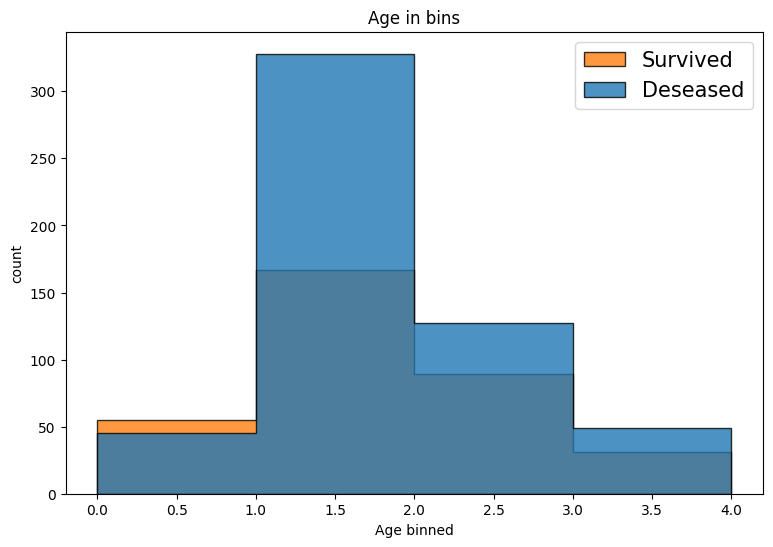

In [75]:
plt.style.use('default')
plt.figure(figsize=(9, 6))
plt.hist([
    titanic_data[titanic_data['Survived'] == 0]['Age'],
    titanic_data[titanic_data['Survived'] == 1]['Age']],
         bins=4,
         histtype='stepfilled',
         label=['Deseased', 'Survived'],
         edgecolor='black',
         alpha=0.8)
plt.ylabel('count')
plt.xlabel('Age binned')
plt.title('Age in bins')
plt.legend(prop={'size': 15})
plt.show()

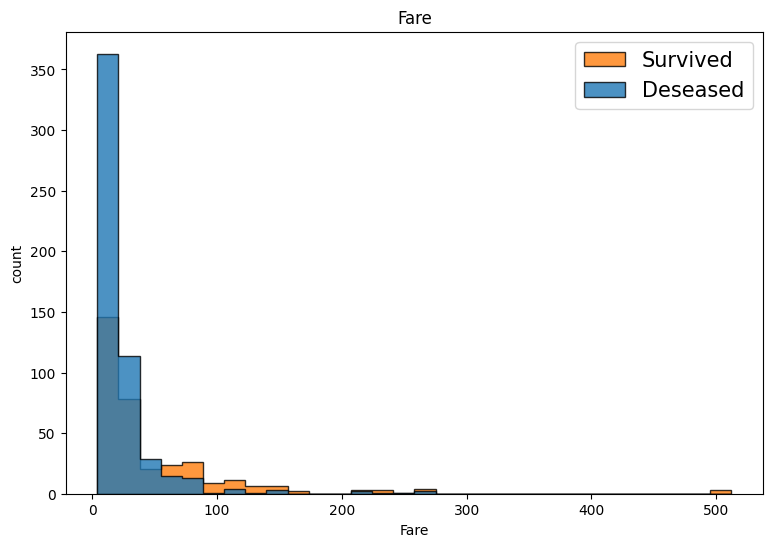

In [76]:
plt.figure(figsize=(9, 6))
plt.hist([
    titanic_data[titanic_data['Survived'] == 0]['Fare'],
    titanic_data[titanic_data['Survived'] == 1]['Fare']
],
         bins=30,
         histtype='stepfilled',
         label=['Deseased', 'Survived'],
         edgecolor='black',
         alpha=0.8)
plt.ylabel('count')
plt.xlabel('Fare')
plt.title('Fare')
plt.legend(prop={'size': 15})
plt.show()

#### inference:
As it was already shown above it seems like people who had been alone aboard had much smaleer chances to survive <br>
At this moment I'd like to keep SibSp, Parch and Pclass feature numerical

In [77]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    int64  
 3   Fare         891 non-null    float64
 4   Acompained   891 non-null    int64  
 5   IsAlone      891 non-null    int64  
 6   Sex_male     891 non-null    uint8  
 7   Embarked_Q   891 non-null    uint8  
 8   Embarked_S   891 non-null    uint8  
 9   Title_Miss   891 non-null    uint8  
 10  Title_Mr     891 non-null    uint8  
 11  Title_Mrs    891 non-null    uint8  
 12  Title_Other  891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(7)
memory usage: 48.0 KB


In [78]:
titanic_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Age          418 non-null    int64  
 2   Fare         418 non-null    float64
 3   Acompained   418 non-null    int64  
 4   IsAlone      418 non-null    int64  
 5   Sex_male     418 non-null    uint8  
 6   Embarked_Q   418 non-null    uint8  
 7   Embarked_S   418 non-null    uint8  
 8   Title_Miss   418 non-null    uint8  
 9   Title_Mr     418 non-null    uint8  
 10  Title_Mrs    418 non-null    uint8  
 11  Title_Other  418 non-null    uint8  
dtypes: float64(1), int64(4), uint8(7)
memory usage: 19.3 KB


# 5. Building models

In [79]:
# Train data

X_train = titanic_data.drop(['Survived'], axis=1)
display(X_train.head())
y_train = titanic_data.Survived
display(y_train.head())

,Pclass,Age,Fare,Acompained,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,1,7.2500,0,0,1,0,1,0,1,0,0
1,1,2,71.2833,0,0,0,0,0,0,0,1,0
2,3,1,7.9250,0,1,0,0,1,1,0,0,0
3,1,2,53.1000,1,0,0,0,1,0,0,1,0
4,3,2,8.0500,0,1,1,0,1,0,1,0,0


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [80]:
X_test = titanic_data_test
X_test.head()

,Pclass,Age,Fare,Acompained,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,2,7.8292,0,1,1,1,0,0,1,0,0
1,3,2,7.0000,0,0,0,0,1,0,0,1,0
2,2,3,9.6875,0,1,1,1,0,0,1,0,0
3,3,1,8.6625,0,1,1,0,1,0,1,0,0
4,3,1,12.2875,0,0,0,0,1,0,0,1,0


## 5.1 Decision tree classifier

### 5.1.1 Find the best model using GridSearch

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

In [93]:
# classifier
clf = tree.DecisionTreeClassifier()
# parameters of model to optimise
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': range(1, 15),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 13)
              }

np.random.seed(0)
# Initialize model to search for the best parameters in cross validation
grid_search_cv_cls = GridSearchCV(clf, parameters, cv=5)

# run it
grid_search_cv_cls.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])})

In [94]:
# look at the best parameter (cross validation max precision)
print(grid_search_cv_cls.best_params_)
print(grid_search_cv_cls.best_score_)

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 9}
0.830525390747599


In [95]:
best_clf = grid_search_cv_cls.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=6,
                       min_samples_split=9)

In [96]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({
    'features': list(X_train),
    'feature_importances': feature_importances
})

# The most important features
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
9,Title_Mr,0.466651
2,Fare,0.200141
0,Pclass,0.188867
11,Title_Other,0.077126
1,Age,0.035434
7,Embarked_S,0.009108
5,Sex_male,0.008748
3,Acompained,0.006275
6,Embarked_Q,0.003869
4,IsAlone,0.003783


In [97]:
y_pred = best_clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [98]:
y_test_passenger_id = pd.read_csv('test.csv').PassengerId
test_output = pd.DataFrame({'PassengerId': y_test_passenger_id, 'Survived': y_pred})
test_output_no_index = test_output.set_index('PassengerId')
display(test_output_no_index.head())
test_output_no_index.to_csv('predictions_decision_tree_v3.csv')

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


### With this classifier test score = 0.77272

### 5.1.2 Use pruning to improve classifier

In [100]:
path = best_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

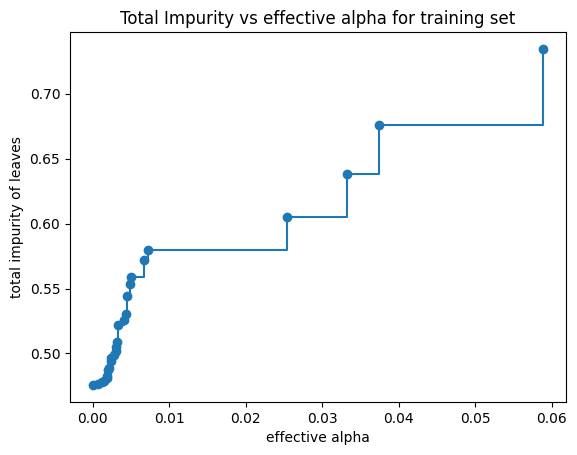

In [101]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [103]:
pd.DataFrame({'cpp_alpha': ccp_alphas[:-1], 'impurity': impurities[:-1]})

,cpp_alpha,impurity
0,0.000000,0.475786
1,0.000741,0.476527
2,0.001170,0.477697
3,0.001430,0.479127
4,0.001876,0.481004
5,0.001925,0.482928
6,0.002004,0.486937
7,0.002197,0.489134
8,0.002378,0.493890
9,0.002449,0.496339


In [107]:
# We don't have access to test targets so jus pick the number

cpp_alpha_test = 0.00728
new_clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=cpp_alpha_test, **grid_search_cv_cls.best_params_)

In [112]:
new_clf

DecisionTreeClassifier(ccp_alpha=0.00728, criterion='entropy', max_depth=6,
                       min_samples_leaf=6, min_samples_split=9, random_state=0)

In [111]:
new_clf.fit(X_train, y_train)
new_clf.score(X_train, y_train)

0.8316498316498316

In [113]:
# predict on train
y_pred = new_clf.predict(X_test)

y_test_passenger_id = pd.read_csv('test.csv').PassengerId
test_output = pd.DataFrame({'PassengerId': y_test_passenger_id, 'Survived': y_pred})
test_output_no_index = test_output.set_index('PassengerId')
display(test_output_no_index.head())
test_output_no_index.to_csv('predictions_decision_tree_v3p1_pruned.csv')

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


### Yeah! Pruning with alpha = 0.00728 slightly improved score on test data
### Test score = 0.78229

In [114]:
# Feature importance for prunned tree

feature_importances = new_clf.feature_importances_
feature_importances_df = pd.DataFrame({
    'features': list(X_train),
    'feature_importances': feature_importances
})

# The most important features
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
9,Title_Mr,0.582424
0,Pclass,0.235723
11,Title_Other,0.096260
2,Fare,0.085593
1,Age,0.000000
3,Acompained,0.000000
4,IsAlone,0.000000
5,Sex_male,0.000000
6,Embarked_Q,0.000000
7,Embarked_S,0.000000


## 5.2 Random forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score

### Model 1

In [82]:
%%time
cls_rf = RandomForestClassifier(random_state=0)

# Parameters grid for random forest
parameters = {'n_estimators': np.arange(10, 20, 3),
              'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(4, 20, 2),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 12)
             }

# Gird itself
grid_search_rf = GridSearchCV(cls_rf, param_grid=parameters, cv=5, n_jobs=-1)

# Fit the data
grid_search_rf.fit(X_train, y_train)

CPU times: user 1min 17s, sys: 1.13 s, total: 1min 18s
Wall time: 8min 36s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                         'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([10, 13, 16, 19])})

In [83]:
display(grid_search_rf.best_params_)
display(grid_search_rf.best_score_)

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 1,
 'min_samples_split': 9,
 'n_estimators': 19}

0.8316615403929445

### Model 2: more accurate search for best parameters

In [85]:
%%time

### Some parameters of best model are close to range limit so we should estimate it again
cls_rf = RandomForestClassifier(random_state=42)

# Parameters grid for random forest
parameters_updated = {'n_estimators': np.arange(15, 25),
              'criterion': ['entropy'],
              'max_depth': np.arange(5, 20),
              'min_samples_leaf': np.arange(1, 10),
              'min_samples_split': np.arange(2, 12)
             }

# Gird itself
grid_search_rf = GridSearchCV(cls_rf, param_grid=parameters_updated, cv=5, n_jobs=-1)

# Fit the data
grid_search_rf.fit(X_train, y_train)

CPU times: user 3min 50s, sys: 3.96 s, total: 3min 54s
Wall time: 21min 35s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])})

In [119]:
rf_param_limits = {}
for k, v in grid_search_rf.param_grid.items():
    if type(v[0]) == np.int64:
        rf_param_limits[k] = [v.min(), v.max()]
    else:
        rf_param_limits[k] = [v[0], v[0]]
        
rf_param_limits['value'] = ['min', 'max']
        
rf_param_df = pd.DataFrame(rf_param_limits)
rf_best_param_df = pd.DataFrame(grid_search_rf.best_params_, index=[2])
rf_best_param_df['value'] = ['best']
rf_best_param_df = pd.concat([rf_param_df, rf_best_param_df]).set_index('value')
rf_best_param_df

,n_estimators,criterion,max_depth,min_samples_leaf,min_samples_split
value,,,,,
min,15,entropy,5,1,2
max,24,entropy,19,9,11
best,20,entropy,12,1,7


In [120]:
display(grid_search_rf.best_params_)
display(grid_search_rf.best_score_)

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 20}

0.8384093904965162

In [121]:
best_clf = grid_search_rf.best_estimator_
best_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [124]:
y_pred = best_clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [125]:
y_test_passenger_id = pd.read_csv('test.csv').PassengerId
test_output = pd.DataFrame({'PassengerId': y_test_passenger_id, 'Survived': y_pred})
test_output_no_index = test_output.set_index('PassengerId')
display(test_output_no_index.head())
test_output_no_index.to_csv('predictions_random_forest_v2.csv')

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


### With this model we have score = 0.75837 (not very good so far)

### Model 3: add more parameters to GridSearch

In [135]:
%%time

### Some parameters of best model are close to range limit so we should estimate it again
cls_rf = RandomForestClassifier(random_state=42)
cls_rf_max_features = int(np.ceil(np.sqrt(X_train.columns.shape[0])))
print(f"Max features = {cls_rf_max_features}")

# Parameters grid for random forest
parameters_updated = {'n_estimators': np.arange(15, 25),
              'criterion': ['entropy'],
              'max_depth': np.arange(5, 20),
              'min_samples_leaf': np.arange(1, 10),
              'min_samples_split': np.arange(2, 12),
              'max_features': np.arange(2, 7),
              'bootstrap': [True, False]
             }

# Gird itself
grid_search_rf = GridSearchCV(cls_rf, param_grid=parameters_updated, cv=3, n_jobs=-1)

# Fit the data
grid_search_rf.fit(X_train, y_train)

Max features = 4
CPU times: user 15min 16s, sys: 12.9 s, total: 15min 29s
Wall time: 2h


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'max_features': array([2, 3, 4, 5, 6]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])})

In [136]:
display(grid_search_rf.best_estimator_)
display(grid_search_rf.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=5,
                       min_samples_leaf=3, min_samples_split=10,
                       n_estimators=24, random_state=42)

0.8439955106621774

In [152]:
def show_grid_params(grid_search_cv):
    rf_param_limits = {}
    for k, v in grid_search_cv.param_grid.items():
        if type(v[0]) == np.int64:
            rf_param_limits[k] = [v.min(), v.max()]
        elif type(v[0]) == bool:
            rf_param_limits[k] = [bool(np.min(list(map(int, grid_search_rf.param_grid['bootstrap'])))), \
                                  bool(np.max(list(map(int, grid_search_rf.param_grid['bootstrap']))))]
        else:
            rf_param_limits[k] = [v[0], v[0]]

    rf_param_limits['value'] = ['min', 'max']

    rf_param_df = pd.DataFrame(rf_param_limits)
    rf_best_param_df = pd.DataFrame(grid_search_rf.best_params_, index=[2])
    rf_best_param_df['value'] = ['best']
    rf_best_param_df = pd.concat([rf_param_df, rf_best_param_df]).set_index('value')
    return rf_best_param_df

In [153]:
show_grid_params(grid_search_rf)

,n_estimators,criterion,max_depth,min_samples_leaf,min_samples_split,max_features,bootstrap
value,,,,,,,
min,15,entropy,5,1,2,2,False
max,24,entropy,19,9,11,6,True
best,24,entropy,7,3,10,5,True


n_estimators parameter is at the top limit (24) but we can try to apply it on test data without further adjastments at see what we got

In [154]:
best_clf = grid_search_rf.best_estimator_
grid_search_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 24}

In [155]:
y_pred = best_clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [156]:
def save_predictions(filename, y_predicted):
    y_test_passenger_id = pd.read_csv('test.csv').PassengerId
    test_output = pd.DataFrame({'PassengerId': y_test_passenger_id, 'Survived': y_predicted})
    test_output_no_index = test_output.set_index('PassengerId')
    display(test_output_no_index.head())
    test_output_no_index.to_csv(filename)
    
save_predictions('predictions_random_forest_v3.csv', y_pred)

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0


### Score = 0.76315
Better then previous but still worse then one decision tree

### Model 4: adjust greed search parameters again

In [187]:
%%time

### Some parameters of best model are close to range limit so we should estimate it again
cls_rf = RandomForestClassifier(random_state=42)
cls_rf_max_features = int(np.ceil(np.sqrt(X_train.columns.shape[0])))
print(f"Max features = {cls_rf_max_features}")

# Parameters grid for random forest
parameters_updated = {'n_estimators': np.arange(8, 13),
              'criterion': ['entropy'],
              'max_depth': np.arange(11, 17),
              'min_samples_leaf': np.arange(1, 5),
              'min_samples_split': np.arange(7, 13),
              'max_features': ['auto', 'sqrt'],
              'bootstrap': [True]
             }

# Gird itself
grid_search_rf = GridSearchCV(cls_rf, param_grid=parameters_updated, cv=5, n_jobs=-1)

# Fit the data
grid_search_rf.fit(X_train, y_train)

Max features = 4
CPU times: user 18.1 s, sys: 252 ms, total: 18.3 s
Wall time: 1min 33s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy'],
                         'max_depth': array([11, 12, 13, 14, 15, 16]),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([ 7,  8,  9, 10, 11, 12]),
                         'n_estimators': array([ 8,  9, 10, 11, 12])})

In [188]:
show_grid_params(grid_search_rf)

,n_estimators,criterion,max_depth,min_samples_leaf,min_samples_split,max_features,bootstrap
value,,,,,,,
min,8,entropy,11,1,7,auto,True
max,12,entropy,16,4,12,auto,True
best,10,entropy,13,1,9,auto,True


In [189]:
display(grid_search_rf.best_estimator_)
display(grid_search_rf.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_split=9,
                       n_estimators=10, random_state=42)

0.8406251961584331

In [190]:
best_clf = grid_search_rf.best_estimator_

In [191]:
y_pred = best_clf.predict(X_test)
y_pred
save_predictions('predictions_random_forest_v7.csv', y_pred)

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


### Now it's slightly better but still worse then one decision tree
### Score = 0.77033

Ok, now my thoughts are: what is good for a single decision tree may be not so good for the forest.
Possibly for random forest we should not drop all 'excessive' columns like SibSp, Parch and others because the behaviour of random forest model is not the same as one decision tree and multicolliniarity is not a problem for the forest.